<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Data%20Analytics%20With%20Python/Program8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Linear Regression

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/toyota.csv')
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
#Let us look at the correlation between various variables in the toyota dataframe
df.corr()

<ipython-input-2-a83afbf35191>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


###The correlation matrix displays correlation coefficients for all pairs of variables.
###The correlation coefficient shows how strongly two variables. It can be +ve(increasing effect) or -ve(decreasing effect).
###We saw that there is a negative correlation between price of a car and its age i.e. as age increases the price decreases.

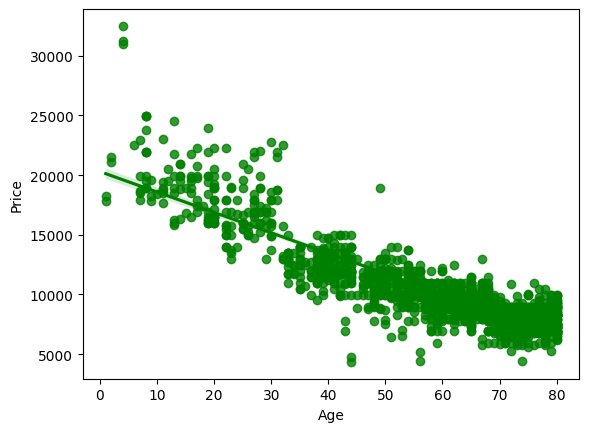

In [ ]:
#To visualize the correlation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.regplot(x=df['Age'],y=df['Price'],fit_reg=True,color='green')
plt.show()

###A regression model describes how y(Price) is related to x(Age). A simple linear regression model is of the form
###y=b0+b1*x
###The above equation represents a straight line whose slope is b1 and y intercept is b0. Thus the equation helps us to predict values of y corresponding to some value of x.

In [ ]:
#Let us look how we can get a linear regression model for x=Age and y=Price
import statsmodels.api as s
x=list(df['Age'])
y=list(df['Price'])
x=s.add_constant(x)
model=s.OLS(y,x)
result=model.fit()
result.summary()
beta=[]
beta.append(result.params[0])
beta.append(result.params[1])

###The coef column in the above result contains y intercept(const) and the slope(x1). Besides we can see various other terms like R^2, F-statistic, t- statistic etc.
###These terms are useful when we do not consider the entire population but only the samples. In this case, the linear regression model obtained is called estimated lrm.
###To check if the estimated slope holds good for the entire population we perform t test(for two variables) or f test(anova)(generally used when there are more than two variables).
###The null hypothesis is:H0:B0=0 where B0 is the slope corresponding to the population.
###If the null hypothesis becomes true, then it means that there is no relation between y and x at the population level.
###The term R^2 is called coefficient of determination. It describes how well the model performs. It basically checks if the model's error is explained by variation of x alone or not. If R^2 is 1 it means the model is perfect i.e. it gives exact values of y corresponding to x. If R^2 is zero, it means that there is no relation between x and y

In [ ]:
#Let us perform the same operation using sklearn module
import sklearn.model_selection as sk
x=df['Age'].values.reshape(-1,1)     #Converting data into 2D arrays
y=df['Price'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=sk.train_test_split(x,y,test_size=.2,random_state=88)
#The data is split into two parts:train and test
#train is used to train the model while test is used to check the accuracy of the model.

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train) #Prepare the model
#Display information
print("Y Intercept=",reg.intercept_)
print("Slope=",reg.coef_)
print("Score(R^2)=",reg.score(x_test,y_test))
y_predict=reg.predict(x_test)
print("x value\tPredicted y value\tActual y value")
for i in range(10):
  print(x_test[i],"\t",y_predict[i],"\t",y_test[i])

Y Intercept= [20459.65007599]
Slope= [[-173.61275839]]
Score(R^2)= 0.7387438809080288
x value	Predicted y value	Actual y value
[14] 	 [18029.07145852] 	 [18800]
[75] 	 [7438.69319672] 	 [8950]
[62] 	 [9695.65905579] 	 [9450]
[62] 	 [9695.65905579] 	 [10450]
[27] 	 [15772.10559945] 	 [16750]
[65] 	 [9174.82078062] 	 [9850]
[56] 	 [10737.33560613] 	 [10750]
[61] 	 [9869.27181418] 	 [8750]
[17] 	 [17508.23318335] 	 [17450]
[32] 	 [14904.0418075] 	 [12950]


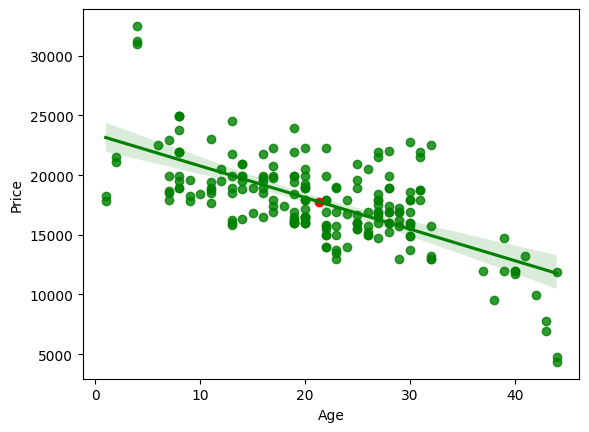

In [ ]:
#Now suppose we consider only samples instead of the populations.
#Let the sample size be 200
sns.regplot(x=df['Age'][:200],y=df['Price'][:200],fit_reg=True,color='green')
plt.scatter(np.mean(df['Age'][:200]),np.mean(df['Price'][:200]),color='red')  #This line shows the mean of the data as red dots
plt.show()
#Notice the light colored boundary around the regression line.
#This is a Confidence interval for the mean value of y for a given value of x
#This applies when we look at samples instead of entire populations

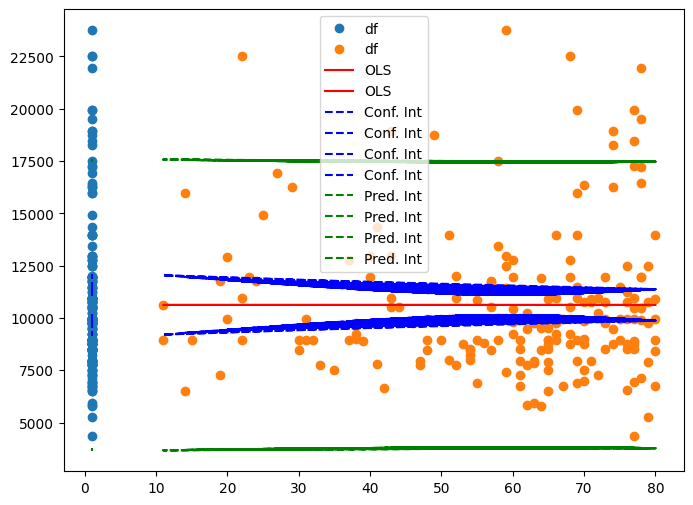

In [ ]:
#Prepare model for sample
import random as rd
x=rd.sample(list(df['Age']),200)
y=rd.sample(list(df['Price']),200)
x1=x.copy()
y1=y.copy()
x=s.add_constant(x)
model=s.OLS(y,x)
result=model.fit()

#Preparing prediction intervals, confidence intervals
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(result,alpha=0.05)
fittedvalues=data1[:,2]
ci_low,ci_up=data1[:,4:6].T
pred_low,pred_up=data1[:,6:8].T

#Displaying the graph with prediction and confidence intervals.
X=s.add_constant(x)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='df')
ax.plot(X,fittedvalues,'r-',label='OLS')
ax.plot(X,ci_low,'b--',label="Conf. Int")
ax.plot(X,ci_up,'b--',label='Conf. Int')
ax.plot(X,pred_low,'g--',label="Pred. Int")
ax.plot(X,pred_up,'g--',label="Pred. Int")
ax.legend(loc='best');
plt.show()

###Residual Analysis:To determine if the assumptions that we make about the error term in the linear regression model are true. The assumptions are:
###1.Normal distribution
###2.Mean is Zero
###3.Independent and
###4.Variance is same for all x terms
###We must check the validity of these assumptions because they are the ground for the t test and f test which were discussed above. If the assumptions are questionable, then the test itself is compromised.
###We make use of residual(error) plots to determine the validity of the assumptions.

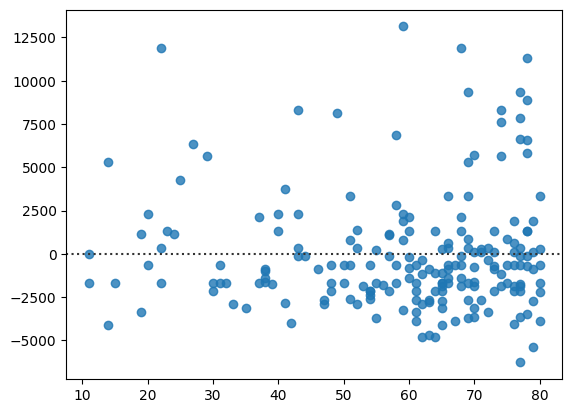

In [ ]:
#Residual Plot of Residual against x
sns.residplot(x=x1,y=y1)
plt.show()
#If the pattern is more or less rectangular,it indicates the variance of error is nearly same for all x values
#Else variance is not same.

#The residual plot of residual against y^ is also similar but more widely used because,
#in the case of multiple regression, we have to draw seperate plots for each variable. This can be avoided by
#using a single plot of residual against y^

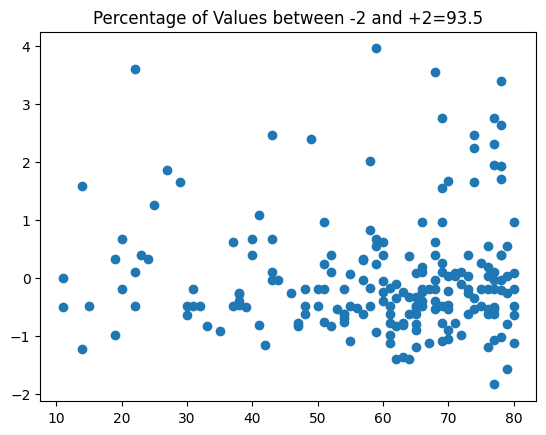

In [ ]:
#Next we need to check if the residuals have a normal distribution or not.
#For that we use standardized residuals.
#If most of these(95%) residuals fall within -2 and 2, then we can say that residuals have normal dis.
#Otherwise they do not.
influence=result.get_influence()
resid_student=influence.resid_studentized_external
c=0
#finding what percentage of values lie between -2 and 2
for i in resid_student:
  if(i>-2 and i<2):
    c=c+1
plt.title("Percentage of Values between -2 and +2="+str((c/len(resid_student))*100))
plt.scatter(x1,resid_student)
plt.show()
#It can be observed that the two plots(residual and standard-residual) are exactly same but only the y axis has been standardized.

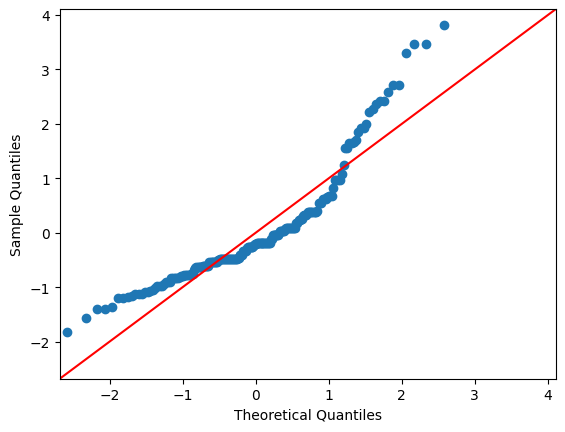

In [ ]:
#Another way to assess normailty is to use the mormal probability plot.
#In this plot the standardized residuals are compared with similar normal scores from a normal distribution.
#(where mean=0 and standard deviation is 1)
#If this plot is inclined at approximately 45 degrees to the x axis, then the residuals are said to be normally distributed.
from scipy import stats
import statsmodels.api as sm
res=result.resid
prbplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=prbplot.qqplot(line='45')
plt.show()


In [ ]:
beta=np.array(beta)
beta=beta.reshape(-1,1)
xt=np.c_[np.ones((len(df['Age']),1)),df['Age']]
y_hat=xt@beta
yt=np.array(df['Price'])
score=((y_hat-yt.mean()).T@(y_hat-yt.mean()))/((yt-yt.mean()).T@(yt-yt.mean()))
print(score)

[[0.7684109]]
